In [ ]:
import pandas as pd 
import pickle 


In [ ]:
change_points = pd.read_csv('/content/changepoints.csv')

In [ ]:
change_points

In [ ]:
with open('/content/drive/MyDrive/ccu_videos/dyad.pkl', 'rb') as f:
    x = pickle.load(f)
with open('/content/drive/MyDrive/ccu_videos/dyad1.pkl', 'rb') as f:
    y = pickle.load(f)

with open('/content/drive/MyDrive/ccu_videos/dyad2.pkl', 'rb') as f:
    z = pickle.load(f)

with open('/content/drive/MyDrive/ccu_videos/dyad3.pkl', 'rb') as f:
    a = pickle.load(f)

with open('/content/drive/MyDrive/ccu_videos/dyad4.pkl', 'rb') as f:
    b = pickle.load(f)

with open('/content/drive/MyDrive/ccu_videos/dyad5.pkl', 'rb') as f:
    c = pickle.load(f)

In [ ]:
total = list(set(x)) + list(set(y)) + list(set(z)) + list(set(a)) + list(set(b)) + list(set(c)) 

In [ ]:
change_points = change_points[change_points['file_id'].isin(total)] 

In [ ]:
change_points.to_csv('/content/drive/MyDrive/ccu_videos/change_points_dyadic.csv')

In [ ]:
#filter videos to videos we want to process later
import os
import shutil
origin = '/content/drive/MyDrive/ccu_videos/videos/video'
target = '/content/drive/MyDrive/ccu_videos/filtered_videos'
files = os.listdir(origin)

# Fetching all the files to directory
for file_name in files:
   print(file_name)
   name = file_name.replace('.mp4',"")
   if name in total:
     f = os.path.join(origin, file_name)
     t = os.path.join(target, file_name)
     shutil.copy(f, t)


In [ ]:
change_points = pd.read_csv('/content/drive/MyDrive/ccu_videos/change_points_dyadic.csv')

In [ ]:
from collections import defaultdict
video_times_stamps = defaultdict(list)
for ind in change_points.index:
  video_times_stamps[change_points['file_id'][ind]].append(change_points['timestamp'][ind])




In [ ]:
with open('/content/drive/MyDrive/ccu_videos/change_points.pickle', 'wb') as handle:
    pickle.dump(video_times_stamps, handle, protocol=pickle.HIGHEST_PROTOCOL)





In [ ]:

with open('/content/drive/MyDrive/ccu_videos/change_points.pickle', 'rb') as f:
  time_stamps = pickle.load(f)

In [ ]:
#lets clip the video segments by the timestamps (leaving 5 seconds before 5 seconds after)
!pip install moviepy


In [ ]:
with open('/content/drive/MyDrive/ccu_videos/change_points.pickle', 'rb') as f:
  time_stamps = pickle.load(f)

In [ ]:
from moviepy.editor import *
time = 200
clip = VideoFileClip("/content/drive/MyDrive/ccu_videos/videos/video/M01003JHU.mp4").subclip(time-10, time+10)
clip.write_videofile("/content/M01003JHU.mp4")

In [ ]:
#create segmented videos
for file_name in os.listdir('/content/drive/MyDrive/ccu_videos/filtered_videos'):
  video = file_name.replace(".mp4", "")
  times = time_stamps[video]
  target = '/content/drive/MyDrive/ccu_videos/clipped_videos'
  video_file = os.path.join('/content/drive/MyDrive/ccu_videos/filtered_videos', file_name)
  for t in times:
    video = video + "_cp_" + str(t) + ".mp4"
    write_file = os.path.join(target, video)
    clip = VideoFileClip(video_file)
    duration = clip.duration
    print(t, duration)
    if duration > t+5:
      start = t-5
      end = t+5
      
      clip = clip.subclip(start, end)
      clip.write_videofile(write_file)
  
  #create a non changepoint clip 
  video = video + "_ncp.mp4"
  write_file = os.path.join(target, video)
  clip = VideoFileClip(video_file).subclip(0,20)
  clip.write_videofile(write_file)




  


In [ ]:
!pip install -q py-feat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.0/612.0 KB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 104.8 MB/s eta 0:00:00


In [ ]:
from feat import Detector

detector = Detector()

detector

In [ ]:
video_prediction = detector.detect_video('/content/drive/MyDrive/ccu_videos/clipped_videos/M01003JPT_cp_230.mp4', skip_frames=80)

In [ ]:
df = detector.detect_video('/content/drive/MyDrive/ccu_videos/clipped_videos/M01003JP8_cp_312.mp4_ncp.mp4', skip_frames=80)


In [ ]:
import pandas as pd 

visual_features = pd.read_csv("/content/drive/MyDrive/ccu_videos/visual_features - visual_features.csv")

In [ ]:
visual_features = visual_features.drop(columns=['Unnamed: 0'], axis = 1)

In [ ]:
visual_features[visual_features['input']=='/content/drive/MyDrive/clipped_videos/M01003OS8_ncp.mp4']


,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame
1702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/content/drive/MyDrive/clipped_videos/M01003OS...,0
1703,171.891040,-2.430191,133.715125,97.497507,0.993162,180.049103,178.954210,179.415097,182.681010,189.068486,...,0.245714,0.023812,0.001570,0.038950,0.018425,0.024437,0.855501,0.037305,/content/drive/MyDrive/clipped_videos/M01003OS...,80
1704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/content/drive/MyDrive/clipped_videos/M01003OS...,160
1705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/content/drive/MyDrive/clipped_videos/M01003OS...,240
1706,350.131724,94.808900,52.369419,66.675815,0.998732,349.653712,350.268380,351.720208,353.576764,356.181584,...,0.739612,0.040720,0.000069,0.000195,0.000690,0.020443,0.262267,0.675616,/content/drive/MyDrive/clipped_videos/M01003OS...,320
1707,201.755315,92.469228,48.354442,65.743301,0.998139,200.704801,200.579228,201.480677,203.604697,206.934392,...,0.738715,0.001534,0.000766,0.161664,0.001206,0.379285,0.031207,0.424338,/content/drive/MyDrive/clipped_videos/M01003OS...,320
1708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/content/drive/MyDrive/clipped_videos/M01003OS...,400
1709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/content/drive/MyDrive/clipped_videos/M01003OS...,480


In [ ]:
import os 
os.listdir('/content/drive/MyDrive/ccu_videos/clipped_videos')

In [ ]:
def extract_labels(inputs):
  labels = []
  for i in inputs:
    i = i.replace("/content/drive/MyDrive/clipped_videos/", "")
    if 'cp' in i.rsplit('_', 1)[0]:
      labels.append("changepoint")
    else:
      labels.append("non_changepoint")
  return labels


labels = extract_labels(visual_features['input'])


In [ ]:
visual_features['label'] = labels

In [ ]:
def split(df, percentage):
  df = df.sample(frac = 1) #shuffle
  index = int(percentage*len(df))
  train = df.iloc[:index,:]
  test = df.iloc[index:,:]

  return train, test 
visual_features = visual_features.dropna()
train, test = split(visual_features, 0.8)



In [ ]:
from sklearn.linear_model import LogisticRegression
y_train = train['label']
X_train = train.drop(['FaceRectX', 'FaceRectY', 'FaceRectWidth', 'FaceRectHeight',
       'FaceScore', 'label', 'input', 'frame'], axis = 1)

y_test = test['label']
X_test = test.drop(['FaceRectX', 'FaceRectY', 'FaceRectWidth', 'FaceRectHeight',
       'FaceScore', 'label', 'input', 'frame'], axis = 1)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import f1_score, accuracy_score
y_pred = clf.predict(X_test)
print("f1: ", f1_score(y_test, y_pred, average='macro'))
print("accuracy: ", accuracy_score(y_test, y_pred))

f1:  0.42706777128887674
accuracy:  0.6970338983050848


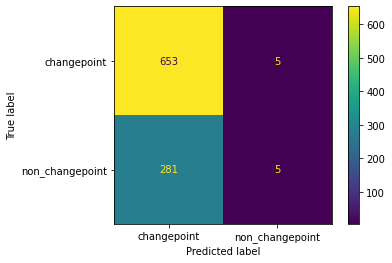

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
#create similarity df
dfs = visual_features.groupby('input')    
dfs_list = [dfs.get_group(x) for x in dfs.groups]

In [ ]:
len(dfs_list[0])

16

In [ ]:
def drop_non_duplicate(df):
  to_drop = []
  for ind in df.index:
    frame = df['frame'][ind]
    d = df[df['frame'] == frame]
    if len(d) %2 != 0:
      to_drop.append(ind)
  
  df = df.drop(to_drop)
  return df

df = drop_non_duplicate(dfs_list[0])

In [ ]:
output_list = [drop_non_duplicate(df) for df in dfs_list]

In [ ]:
import numpy as np
def similarity(df):
  if len(df) > 0:
    sim_df = pd.DataFrame(columns=['sim','label'])
    labels = list(df['label'])
    label = labels[0]
    print(label)
    df = df.drop(['FaceRectX', 'FaceRectY', 'FaceRectWidth', 'FaceRectHeight',
        'FaceScore', 'label', 'input', 'frame'], axis = 1)
    for i in range(0,len(df.index)-1, 2):
      l1 = df.iloc[i]
      l2 = df.iloc[i+1]
      sim = np.dot(l1,l2)/(np.linalg.norm(l1)*np.linalg.norm(l2))
      # row = pd.Series([sim, label], index = sim_df.columns)
      row = [sim, label]
      sim_df.loc[len(sim_df)] = row
    
    return sim_df
      



In [ ]:
sims_list = [similarity(df) for df in output_list]

In [ ]:
similarity_features = pd.concat(sims_list)

In [ ]:
def split(df, percentage):
  df = df.sample(frac = 1) #shuffle
  index = int(percentage*len(df))
  train = df.iloc[:index,:]
  test = df.iloc[index:,:]

  return train, test 
similarity_features = similarity_features.dropna()
train, test = split(similarity_features, 0.8)

NameError: ignored

In [ ]:
from sklearn.linear_model import LogisticRegression
y_train = train['label']
X_train = train.drop(['label'], axis=1)

y_test = test['label']
X_test = test.drop([ 'label'], axis = 1)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

f1:  0.4010152284263959
accuracy:  0.6694915254237288


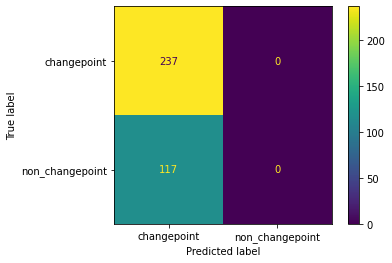

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
y_pred = clf.predict(X_test)
print("f1: ", f1_score(y_test, y_pred, average='macro'))
print("accuracy: ", accuracy_score(y_test, y_pred))


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
visual_features.columns

Index(['FaceRectX', 'FaceRectY', 'FaceRectWidth', 'FaceRectHeight',
       'FaceScore', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4',
       ...
       'anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise',
       'neutral', 'input', 'frame', 'label'],
      dtype='object', length=174)

In [ ]:
import pandas as pd
speech_features = pd.read_csv('/content/drive/MyDrive/ccu_videos/audio_features.csv')

In [ ]:
def input_simpl(df):
  simpl = []
  for ind in df.index:
    input = df['file'][ind]
    input = input.replace(".mp3", "")
    input = input.replace('/content/drive/MyDrive/ccu_videos/audio_clips//',"")
    simpl.append(input)
  return simpl 

input_match = input_simpl(speech_features)
speech_features['input'] = input_match

In [ ]:
combined = pd.merge(visual_features, speech_features, on = 'CATEGORY', how = 'left')

'/content/drive/MyDrive/ccu_videos/audio_clips//M01003JHU_cp_308.mp4_ncp.mp4'

In [ ]:
def input_simplv(df):
  simpl = []
  for ind in df.index:
    input = df['input'][ind]
    input = input.replace('/content/drive/MyDrive/clipped_videos/',"")
    simpl.append(input)
  return simpl 

input_match = input_simplv(visual_features)
visual_features['input'] = input_match

In [ ]:
combined_features = pd.merge(visual_features, speech_features, on = 'input', how = 'left')

In [ ]:
l1 = list(visual_features['input'])
l2 = list(speech_features['input'])

In [ ]:
#train a combined classifer 
def split(df, percentage):
  df = df.sample(frac = 1) #shuffle
  index = int(percentage*len(df))
  train = df.iloc[:index,:]
  test = df.iloc[index:,:]

  return train, test 
combined_features= combined_features.dropna()
combined_features = combined_features.drop(["FaceRectX",	"FaceRectY",	"FaceRectWidth",	"FaceRectHeight",	"FaceScore",	"Unnamed: 0", "file", "input" ,"frame"], axis = 1)
train, test = split(combined_features, 0.8)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


f1:  0.4266401708262173
accuracy:  0.6959745762711864


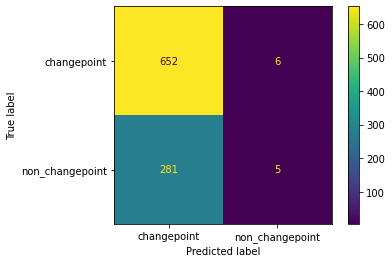

In [ ]:
from sklearn.linear_model import LogisticRegression
y_train = train['label']
X_train = train.drop(['label'], axis=1)

y_test = test['label']
X_test = test.drop([ 'label'], axis = 1)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

from sklearn.metrics import f1_score, accuracy_score
y_pred = clf.predict(X_test)
print("f1: ", f1_score(y_test, y_pred, average='macro'))
print("accuracy: ", accuracy_score(y_test, y_pred))


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
speech_features = speech_features.drop(['Unnamed: 0'], axis = 1)

In [ ]:
speech_features = speech_features.drop(['file'], axis = 1)

In [ ]:
def extract_labels(inputs):
  labels = []
  for i in inputs:
    if 'cp' in i.rsplit('_', 1)[0]:
      labels.append("changepoint")
    else:
      labels.append("non_changepoint")
  return labels
labels = extract_labels(speech_features["input"])

In [ ]:
speech_features["label"] = labels

In [ ]:
train, test = split(speech_features, 0.8)

f1:  0.41666666666666663
accuracy:  0.7142857142857143


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


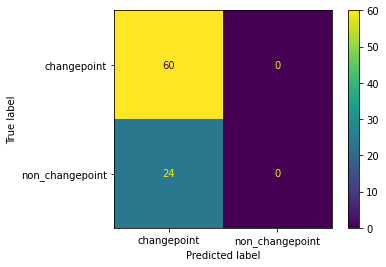

In [ ]:
from sklearn.linear_model import LogisticRegression
y_train = train['label']
X_train = train.drop(['label', 'input'], axis=1)

y_test = test['label']
X_test = test.drop([ 'label','input'], axis = 1)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

from sklearn.metrics import f1_score, accuracy_score
y_pred = clf.predict(X_test)
print("f1: ", f1_score(y_test, y_pred, average='macro'))
print("accuracy: ", accuracy_score(y_test, y_pred))


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()